# Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('./data/encoded_movies_data.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 10700 non-null  object 
 1   Year                  10700 non-null  int64  
 2   Duration              10700 non-null  float64
 3   MPA                   10700 non-null  object 
 4   budget                10700 non-null  float64
 5   directors             10700 non-null  int64  
 6   writers               10700 non-null  int64  
 7   stars                 10700 non-null  int64  
 8   production_companies  10700 non-null  int64  
 9   Category              10700 non-null  int64  
 10  Profit                10700 non-null  float64
 11  Hit                   10700 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1003.3+ KB
None


In [5]:
# 문자열 데이터 처리 (범주형 변환)
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Profit을 범주형 데이터로 변환
df['Profit'] = (df['Profit'] > 0).astype(int)

# Profit 이 float 형태라서 계속 오류가 떠서 방법을 찾아냈더니 이 방법을 알려줬어요.


In [7]:
# X, y 분리
X = df.drop('Profit', axis=1)
y = df['Profit']

In [10]:
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [12]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# 랜덤 포레스트 모델 학습
rf_clf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=5)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [16]:
# 모델 평가
train_score = rf_clf.score(X_train_scaled, y_train)
test_score = rf_clf.score(X_test_scaled, y_test)
print(f"Train Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")

Train Accuracy: 0.92
Test Accuracy: 0.92


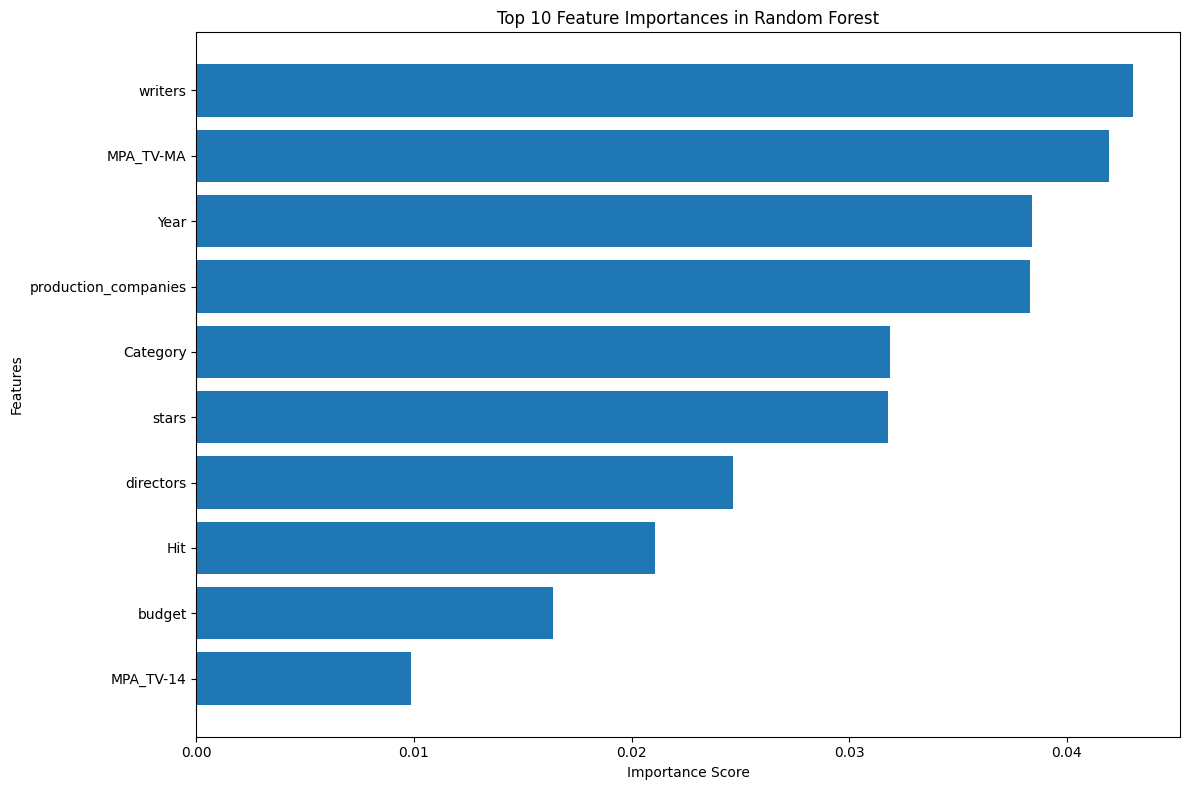

In [18]:
# 중요 변수 시각화
feature_importances = rf_clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features[:10], sorted_importances[:10], align='center')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('random_forest_feature_importance.png')
plt.show()

Train Accuracy: 0.94
Test Accuracy: 0.94

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.95      0.32      0.47       219
           1       0.94      1.00      0.97      2456

    accuracy                           0.94      2675
   macro avg       0.94      0.66      0.72      2675
weighted avg       0.94      0.94      0.93      2675


--- Confusion Matrix ---
[[  69  150]
 [   4 2452]]


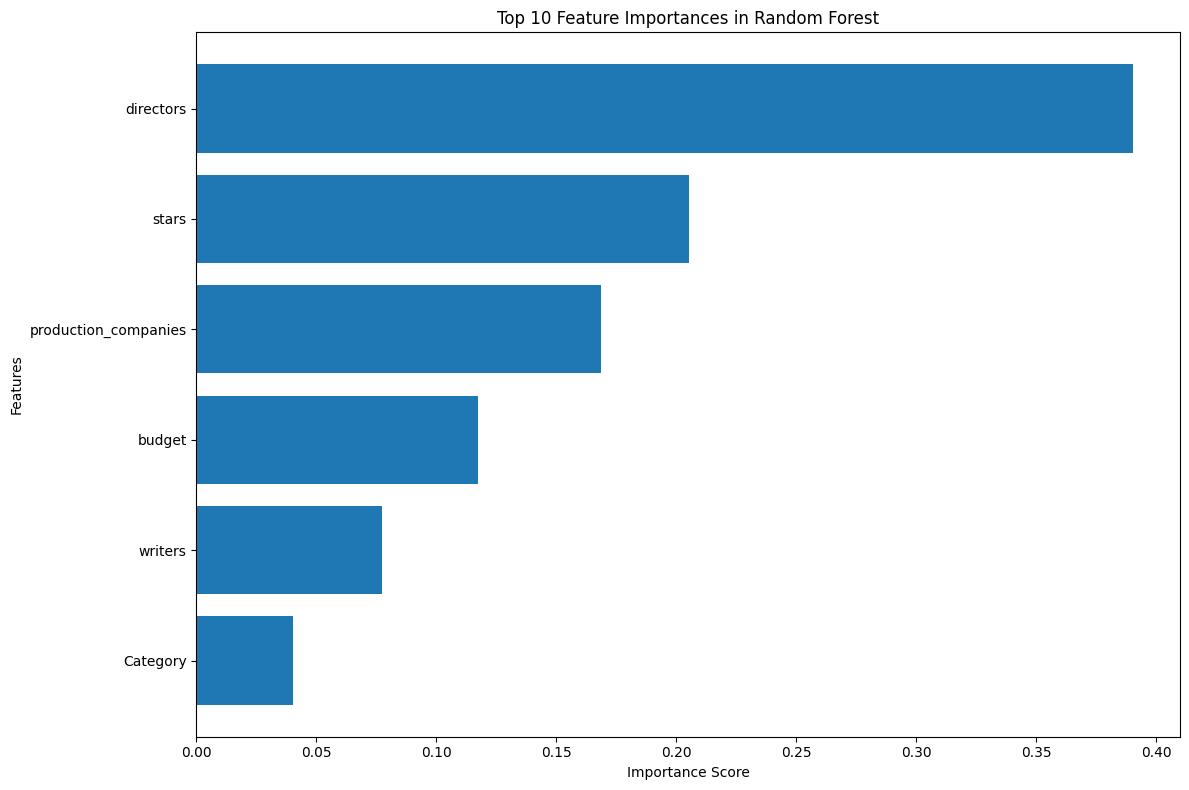

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 로드
df = pd.read_csv('./data/encoded_movies_data.csv')

# Profit을 기준으로 Hit 여부 생성
df['Hit'] = (df['Profit'] > 0).astype(int)  # Profit > 0 -> Hit(1), else -> Not Hit(0)

# X, y 분리
X = df.drop(['Profit', 'Hit', 'Year', 'Title', 'Duration', 'MPA'], axis=1)  # Hit을 제외한 나머지를 독립 변수로 사용
y = df['Hit']

# 문자열 데이터 처리 (범주형 변환)
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 학습
rf_clf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=5)
rf_clf.fit(X_train_scaled, y_train)

# 모델 성능 평가
train_score = rf_clf.score(X_train_scaled, y_train)
test_score = rf_clf.score(X_test_scaled, y_test)
print(f"Train Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")

# 테스트 데이터 예측
y_pred = rf_clf.predict(X_test_scaled)

# 성능 평가 지표 출력
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

# 특성 중요도 시각화
feature_importances = rf_clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(sorted_features[:10], feature_importances[sorted_indices][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig('random_forest_feature_importances.png')
plt.show()


In [22]:
# 사용자 입력 기반 예측 함수
def predict_with_column_input():
    print("\n--- Select one column to provide a value for ---")
    print(f"Available columns: {list(X.columns)}")

    selected_column = input("Enter the column name you want to provide a value for: ").strip()
    if selected_column not in X.columns:
        print("Invalid column name. Please restart and select a valid column.")
        return

    try:
        # 입력값 받기
        value = input(f"Enter the value for {selected_column}: ").strip()

        # y_pred를 계산하기 위한 입력값 생성
        X_test_custom = pd.DataFrame([X_test.iloc[0]])  # 테스트 데이터에서 샘플 하나를 복사
        X_test_custom[selected_column] = value  # 사용자 입력값 업데이트

        # 스케일링 적용
        X_test_custom_scaled = scaler.transform(X_test_custom)

        # 예측 수행
        y_pred = rf_clf.predict(X_test_custom_scaled)[0]
        y_pred_proba = rf_clf.predict_proba(X_test_custom_scaled)[0]

        # 결과 출력
        print("\n--- Prediction Result ---")
        print(f"Input Column: {selected_column}")
        print(f"Input Value: {value}")
        print(f"Prediction: {'Hit' if y_pred == 1 else 'Not Hit'}")
        print(f"Confidence: {y_pred_proba[y_pred] * 100:.2f}%")

    except ValueError:
        print("Invalid input. Please restart and provide a valid value.")

# 사용자 입력 기반 예측 실행
predict_with_column_input()


--- Select one column to provide a value for ---
Available columns: ['budget', 'directors', 'writers', 'stars', 'production_companies', 'Category']

--- Prediction Result ---
Input Column: budget
Input Value: 1000
Prediction: Hit
Confidence: 85.38%
